# Presentación

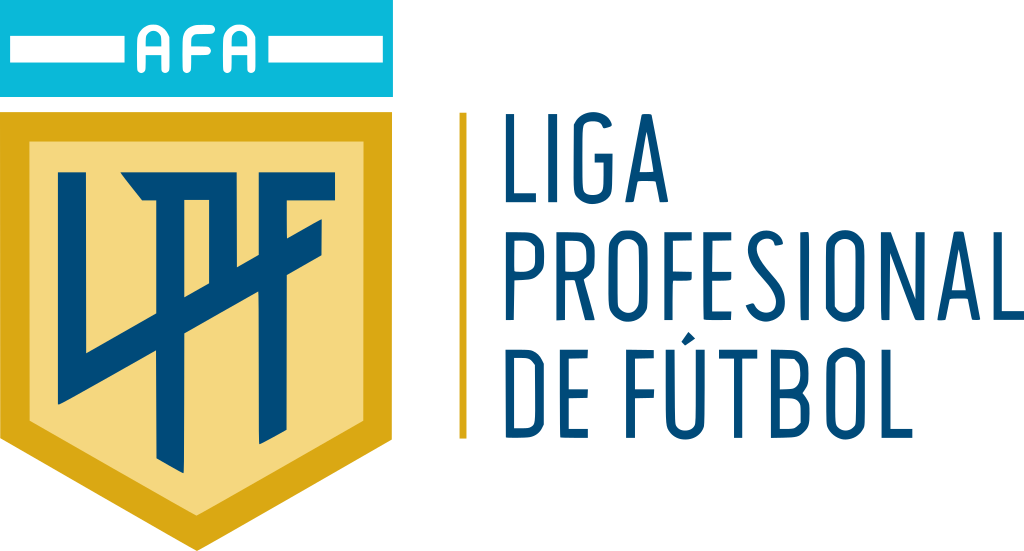

## Descripción y objetivo

En el siguiente archivo se realizará  un análisis acerca de un dataset obtenido de Kaggle (https://www.kaggle.com/datasets/nicolsvrancovich/argentina-first-division-matches-since-2016). El dataset contiene información de partidos de la Liga Profesional de Fútbol 2016-2022, torneo de fútbol profesional de Argentina. En el mismo, se describen los partidos de cada torneo en esos años, con detalles como: equipos que participaron en cada uno, goles, resultado, sede, árbitro, y otros datos específicos del encuentro para cada equipo.

Para este análisis se iniciará con un estudio general del dataset, luego depuración y ajustes sobre el mismo, y finalmente se aplicarán técnicas de visualización para responder preguntas clave sobre hipótesis generadas para el conjunto de datos.

El objetivo del trabajo radicará en identificar patrones futbolísticos, explicar e inferir qué cuestiones tienen mayor relevancia o afectan en mayor medida a los triunfos de los equipos.

Hipótesis y preguntas a resolver:

1. ¿La localía influye significativamente en el resultado del partido?

2. ¿Qué equipos se destacan de manera consistente en ataque o defensa?

3. ¿Cómo ha evolucionado la cantidad de goles a lo largo de las temporadas desde 2016?

## Diccionario

- Temporada: indica el/los años en que se jugó el torneo.
- Semana: semana del torneo en que se jugó el partido.
- Día: día (en palabras) de la semana en que se jugó el partido.
- Fecha: fecha completa (día/mes/año) en que se jugó el partido.
- Hora: hora (formato 24 hs.) en que se jugó el partido.
- Local: equipo que jugó como local el partido (en su cancha).
- Visitante: equipo que jugó como visitante el partido.
- Sedes: nombre del estadio en que se jugó el partido.
- Árbitro: nombre completo del árbitro principal del partido.
- Resultado: descripción de cómo salió el partido según quién ganó o empate ('Local'/'Visitante'/'Empate').

---

Para cada una de las siguientes columnas, en el dataset se hace distinción del mismo atributo pero según "local" o "visitante" (por ej. local_goles y visitante_goles). Se realizará un resúmen en el que cada atributo se explicará una única vez, eliminando las repeticiones derivadas de su distinción entre "local" y "visitante" que representarán "x", para agilizar la explicación:

- x_posesion: porcentaje de posesión de pelota del equipo x.
- x_goles: goles en el partido del equipo x.
- x_asistencias: asistencias de gol en el partido del equipo x.
- x_goles_penal: cantidad de goles que convirtió de penal en el partido el equipo x.
- x_penales: cantidad de penales otorgados en el partido al equipo x.
- x_disparos: cantidad de tiros en ataque en el partido del equipo x.
- x_disparos_puerta: cantidad de tiros al arco en el partido del equipo x.
- x_amarillas: cantidad de tarjetas amarillas recibidas en el partido por el equipo x.
- x_rojas: cantidad de tarjetas rojas recibidas en el partido por el equipo x.
- x_faltas_cometidas: cantidad de faltas cometidas en el partido por el equipo x.
- x_faltas_recibidas: cantidad de faltas recibidas en el partido por el equipo x.
- x_posiciones_adelantadas: cantidad de posiciones adelantadas en el partido por el equipo x.
- x_pases_cruzados: cantidad de pases cruzados (cambios de frente) en el partido por el equipo x.
- x_derribos: cantidad de derribos dados en el partido por el equipo x.
- x_intercepciones: cantidad de recuperaciones de pelota en el partido por el equipo x.
- x_goles_contra: cantidad de goles en contra otorgados en el partido por el equipo x.
- x_puntos_acumulados: total de puntos acumulados en el torneo hasta ese partido por el equipo x.

# Manipulación del dataset

## Carga del dataset

In [ ]:
# Importe de librerías a utilizar
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Vinculación con Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carga de .csv elegido a variable dataset
ds = pd.read_csv("/content/drive/MyDrive/Proyecto DS ParteI - Caraffini/partidos.csv")

## Análisis general del dataset

In [ ]:
ds

,temporada,semana,dia,fecha,hora,local,visitante,sedes,arbitro,resultado,...,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra,local_puntos_acumulados_temporada,visitante_puntos_acumulados_temporada
0,2016-2017,1,Vie,2016-08-26,19:00,Sarmiento,Arsenal,Estadio Eva Peron de Junín,Ariel Penel,local,...,1,16,15,0,21,11,19,0,0,0
1,2016-2017,1,Sáb,2016-08-27,14:00,Gimnasia ELP,Vélez Sarsf,Estadio Juan Carmelo Zerillo,Silvio Trucco,local,...,1,22,13,0,32,18,18,0,0,0
2,2016-2017,1,Sáb,2016-08-27,16:00,Rosario Cent,Defensa y Just,Estadio Dr. Lisandro de la Torre,Mauro Vigliano,empate,...,0,21,18,1,8,26,26,0,0,0
3,2016-2017,1,Sáb,2016-08-27,18:00,Racing Club,Talleres,Estadio Presidente Juan Domingo Perón,Sergio Pezzotta,local,...,0,20,17,2,19,22,24,0,0,0
4,2016-2017,1,Sáb,2016-08-27,19:00,Tucumán,Rafaela,Estadio Monumental Presidente José Fierr...,Facundo Tello,local,...,0,19,12,2,24,16,27,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2022,27,Lun,2022-10-24,15:30,Barracas Central,Newell's OB,Estadio Claudio Fabián Tapia,Luis Lobo Medina,empate,...,0,11,11,1,27,16,5,0,30,36
2128,2022,27,Lun,2022-10-24,16:30,Rosario Cent,Colón,Estadio Dr. Lisandro de la Torre,Franco Acita,empate,...,0,8,7,7,8,15,10,0,33,28
2129,2022,27,Lun,2022-10-24,20:30,Tigre,Arsenal,Estadio José Dellagiovanna,Patricio Loustau,visitante,...,0,6,8,1,8,10,20,0,43,31
2130,2022,19,Mar,2022-10-25,19:00,Vélez Sarsf,CC Córdoba,Estadio José Amalfitani,Fernando Espinoza,local,...,0,0,0,0,0,0,0,0,12,21


In [ ]:
# Muestra datos y estadísticas básicas del dataset (conteo, promedio, desv. estándar, valor min, primer, segundo y tercer cuartil, valor máx.)
ds.describe()

,semana,local_posesion,visitante_posesion,local_goles,visitante_goles,local_asistencias,local_goles_penal,local_penales,local_disparos,local_disparos_puerta,...,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra,local_puntos_acumulados_temporada,visitante_puntos_acumulados_temporada
count,2132.000000,2129.000000,2129.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,13.752814,0.519582,0.481372,1.245310,0.967167,0.848968,0.138368,0.183865,13.580206,4.418856,...,0.175422,14.051595,12.744841,1.892120,16.828330,13.144465,14.119137,0.033302,17.165572,17.343809
std,7.754950,0.107410,0.107337,1.103449,1.028387,0.932083,0.367740,0.426660,4.691580,2.258823,...,0.422497,4.168907,3.976066,1.627311,6.916583,4.504000,5.657258,0.182062,12.104475,11.996226
min,1.000000,0.210000,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.440000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,...,0.000000,11.000000,10.000000,1.000000,12.000000,10.000000,10.000000,0.000000,7.000000,7.000000
50%,14.000000,0.520000,0.480000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,4.000000,...,0.000000,14.000000,13.000000,2.000000,16.000000,13.000000,14.000000,0.000000,16.000000,16.000000
75%,20.000000,0.600000,0.560000,2.000000,2.000000,1.000000,0.000000,0.000000,17.000000,6.000000,...,0.000000,17.000000,15.000000,3.000000,21.000000,16.000000,18.000000,0.000000,25.000000,25.250000
max,30.000000,0.820000,0.790000,8.000000,6.000000,7.000000,3.000000,3.000000,35.000000,13.000000,...,3.000000,33.000000,27.000000,12.000000,44.000000,32.000000,37.000000,2.000000,62.000000,59.000000


In [ ]:
# Muestra info. de las columnas del dataset (índice, encabezado, cant. filas no nulas, tipo de dato)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   temporada                              2132 non-null   object 
 1   semana                                 2132 non-null   int64  
 2   dia                                    2132 non-null   object 
 3   fecha                                  2132 non-null   object 
 4   hora                                   2132 non-null   object 
 5   local                                  2132 non-null   object 
 6   visitante                              2132 non-null   object 
 7   sedes                                  2132 non-null   object 
 8   arbitro                                2132 non-null   object 
 9   resultado                              2132 non-null   object 
 10  local_posesion                         2129 non-null   float64
 11  visi

## Tratamiento de duplicados, nulos y faltantes

### Duplicados

In [ ]:
# Muestra la cantidad de filas duplicadas del dataset
ds.duplicated().sum()

np.int64(0)

No hay datos duplicados en el dataset, no se procede con el tratamiento para ello.

### Nulos

In [ ]:
# Muestra la cantidad de valores nulos en las filas para cada columna del dataset
ds.isnull().sum()

,0
temporada,0
semana,0
dia,0
fecha,0
hora,0
local,0
visitante,0
sedes,0
arbitro,0
resultado,0


En este contexto, esta función da todo 0, excepto para las columnas "local_posesion" y "visitante_posesion", donde muestra el valor 3. Esto indica que para tres filas, estas columnas no contienen valores. Se procede a ver cuáles son esas filas.

In [ ]:
# Muestra las filas para las columnas que se detectaron con nulos del dataset
# con dataset1.isnull().sum()
null_rows = ds[ds['local_posesion'].isnull() | ds['visitante_posesion'].isnull()]
null_rows

,temporada,semana,dia,fecha,hora,local,visitante,sedes,arbitro,resultado,...,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra,local_puntos_acumulados_temporada,visitante_puntos_acumulados_temporada
784,2017-2018,24,Lun,2018-04-23,21:15,Independiente,Defensa y Just,Estadio Presbítero Bartolomé Grella,Hernán Mastrángelo,visitante,...,0,0,0,0,0,0,0,0,42,33
1882,2022,10,Dom,2022-07-24,11:00,Independiente,Tucumán,Estadio Libertadores de América,Fernando Echenique,visitante,...,0,0,0,0,0,0,0,0,8,19
2130,2022,19,Mar,2022-10-25,19:00,Vélez Sarsf,CC Córdoba,Estadio José Amalfitani,Fernando Espinoza,local,...,0,0,0,0,0,0,0,0,12,21


In [ ]:
# Brinda info. sobre las columnas elegidas para reemplazar los valores faltantes
ds[['local_posesion', 'visitante_posesion']].describe()

,local_posesion,visitante_posesion
count,2129.000000,2129.000000
mean,0.519582,0.481372
std,0.107410,0.107337
min,0.210000,0.180000
25%,0.440000,0.410000
50%,0.520000,0.480000
75%,0.600000,0.560000
max,0.820000,0.790000


Observando en el describe() anterior, como la media y la mediana son similares, se decide imputar por media para los valores faltantes.

In [ ]:
# Imputar valores faltantes con la media de cada columna
for column in ['local_posesion', 'visitante_posesion']:
    mean_value = ds[column].mean()
    ds[column].fillna(mean_value, inplace=True)

/tmp/ipython-input-736949312.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ds[column].fillna(mean_value, inplace=True)


Finalmente, se hace un print() para evaluar si efectivamente en esas filas con datos faltantes, ahora se muestran los valores imputados.

In [ ]:
print(ds.loc[[784, 1882, 2130], ['local_posesion', 'visitante_posesion']])

      local_posesion  visitante_posesion
784         0.519582            0.481372
1882        0.519582            0.481372
2130        0.519582            0.481372


### Outliers

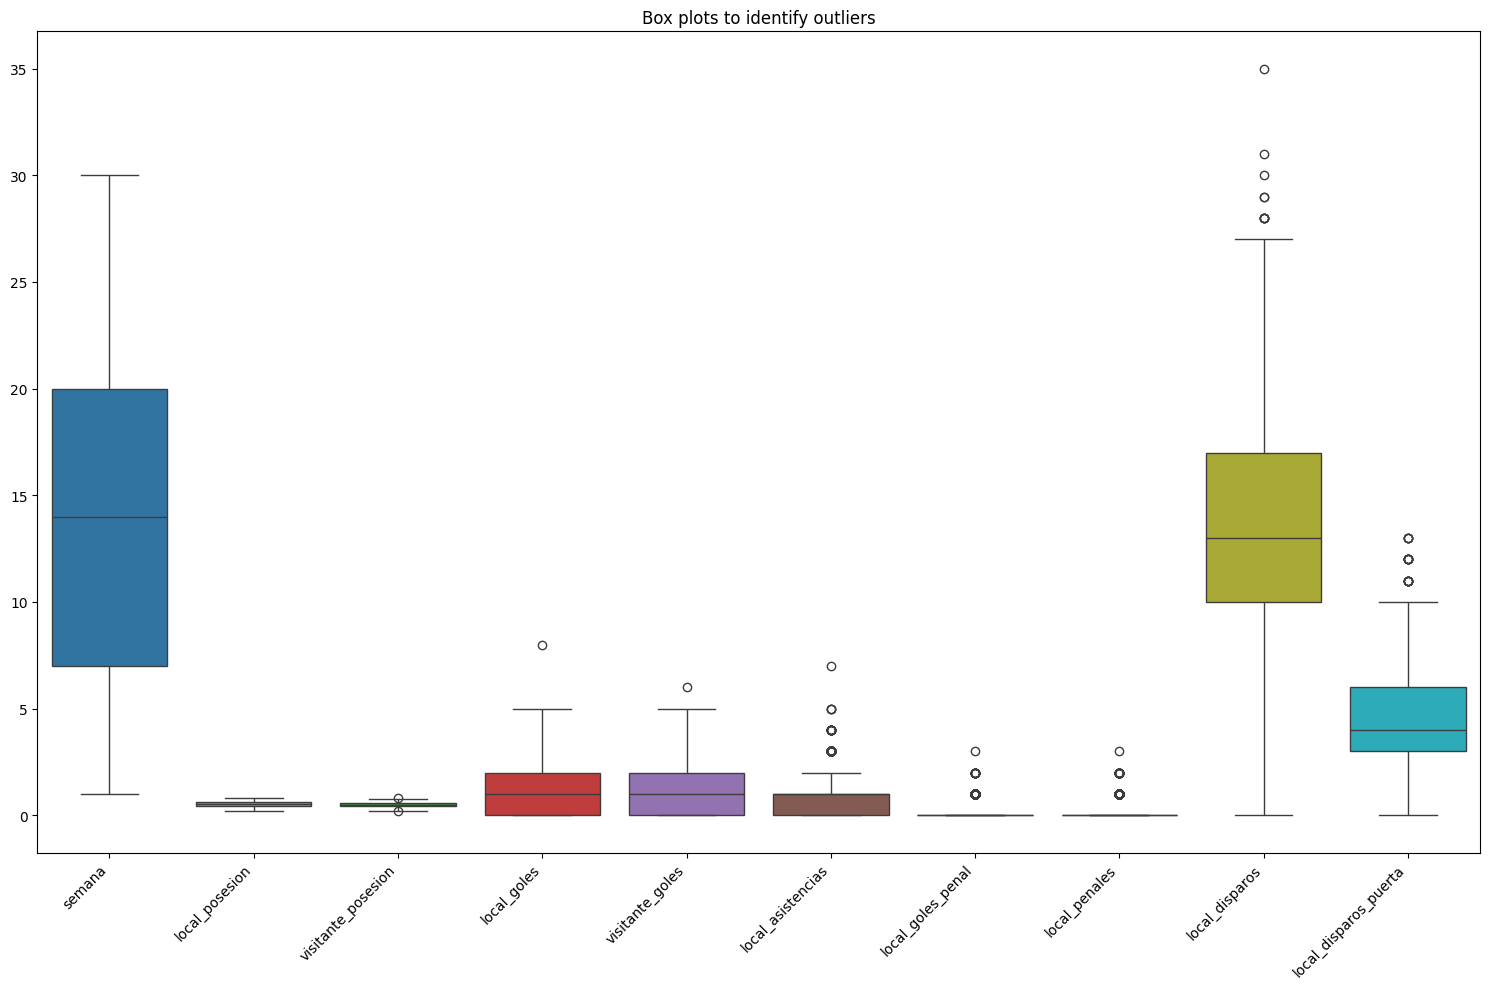

In [ ]:
numeric_cols = ds.select_dtypes(include=np.number).columns.tolist()

cols_to_plot = numeric_cols[:10]

plt.figure(figsize=(15, 10))
sns.boxplot(data=ds[cols_to_plot])
plt.title('Box plots to identify outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = ds.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

ds = ds[(ds[col] >= lower_bound) & (ds[col] <= upper_bound)]

# Análisis visual

## Pregunta 1: ¿La localía influye significativamente en el resultado del partido?

/tmp/ipython-input-4270488769.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='resultado', data=ds, palette="Greens")


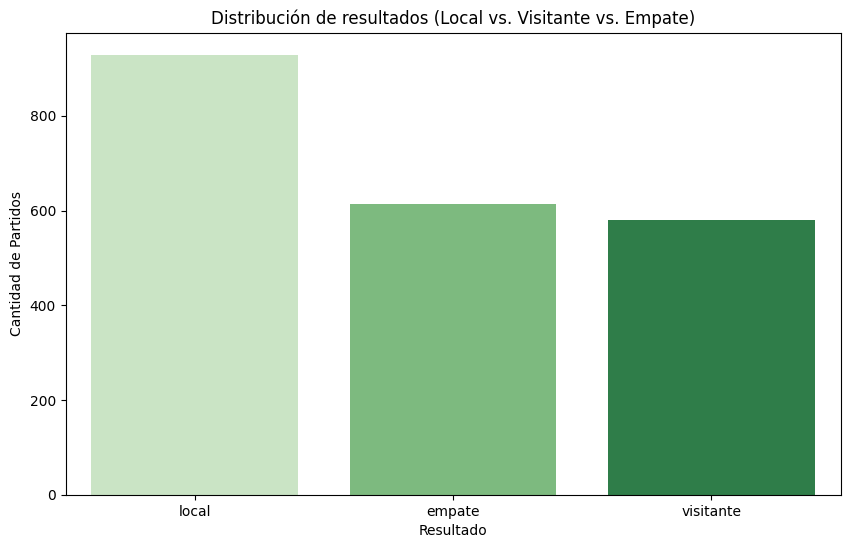

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='resultado', data=ds, palette="Greens")
plt.title('Distribución de resultados (Local vs. Visitante vs. Empate)')
plt.xlabel('Resultado')
plt.ylabel('Cantidad de Partidos')
plt.show()

**RTA:** Según el gráfico anterior, existe una clara ventaja para los equipos que juegan de local (en su propia cancha) a la hora de ganar sus partidos, ya que se demuestra que de la mayoría de partidos los gana el local, luego hay empates, y finalmente, en menor medida ganan los equipos visitantes. Se confirma la pregunta 1.

## Pregunta 2: ¿Qué equipos se destacan consistentemente en ataque o defensa?

/tmp/ipython-input-161465847.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ataque, x="Promedio goles a favor", y="Equipo", ax=axes[0], palette="Blues_r")
/tmp/ipython-input-161465847.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_defensa, x="Promedio goles en contra", y="Equipo", ax=axes[1], palette="Greens")


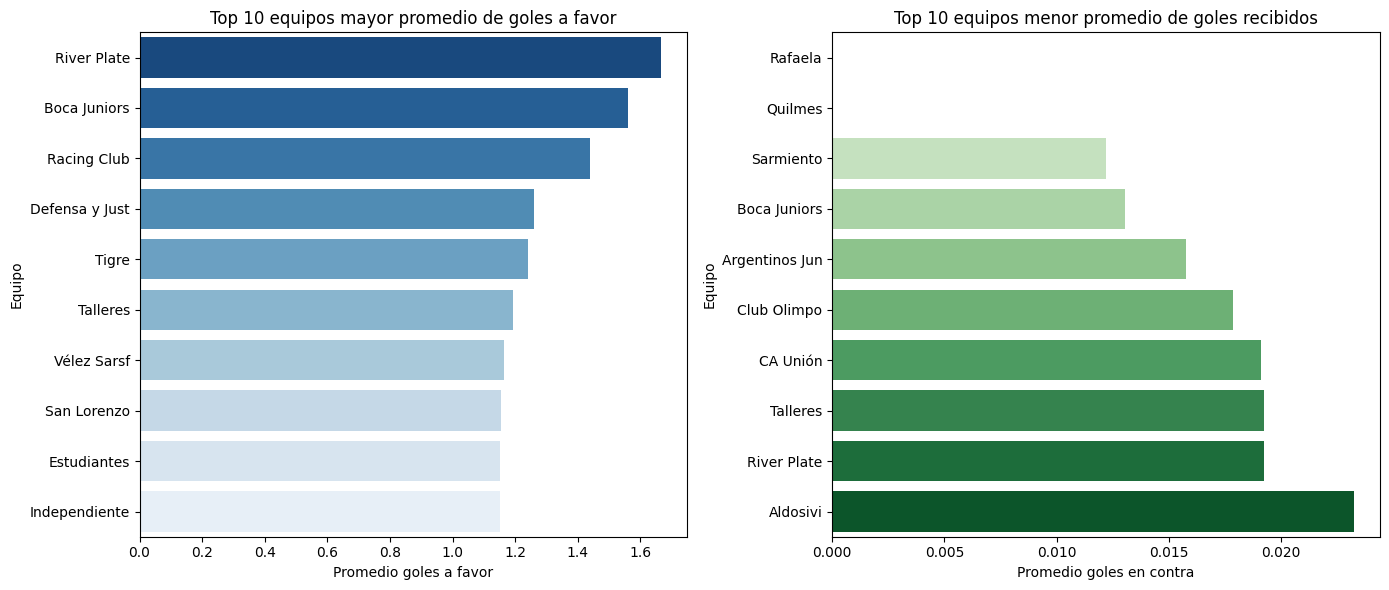

In [ ]:
partidos_local = ds.groupby('local')['local_goles'].count()
partidos_visitante = ds.groupby('visitante')['visitante_goles'].count()
total_partidos = partidos_local.add(partidos_visitante, fill_value=0)

total_goles_favor = ds.groupby('local')['local_goles'].sum() + ds.groupby('visitante')['visitante_goles'].sum()
total_goles_contra = ds.groupby('local')['local_goles_contra'].sum() + ds.groupby('visitante')['visitante_goles_contra'].sum()

promedio_goles_favor = total_goles_favor / total_partidos
promedio_goles_contra = total_goles_contra / total_partidos

golesafavor_df = promedio_goles_favor.reset_index()
golesafavor_df.columns = ['Equipo', 'Promedio goles a favor']

golescontra_df = promedio_goles_contra.reset_index()
golescontra_df.columns = ['Equipo', 'Promedio goles en contra']

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Ataque
top_ataque = golesafavor_df.sort_values(by='Promedio goles a favor', ascending=False).head(10)
sns.barplot(data=top_ataque, x="Promedio goles a favor", y="Equipo", ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 equipos mayor promedio de goles a favor")

# Defensa
top_defensa = golescontra_df.sort_values(by='Promedio goles en contra', ascending=True).head(10)
sns.barplot(data=top_defensa, x="Promedio goles en contra", y="Equipo", ax=axes[1], palette="Greens")
axes[1].set_title("Top 10 equipos menor promedio de goles recibidos")

plt.tight_layout()
plt.show()

**RTA**: Según el gráfico anterior, analizando los goles a favor y en contra de cada equipo, el mejor equipo en ataque es River con un promedio de poco más de 1.6 goles convertidos, y el mejor equipo en defensa es Rafaela con un promedio de 0.0 goles recibidos. Se responde la pregunta 2.

## Pregunta 3: ¿Cómo ha evolucionado la cantidad de goles a lo largo de las temporadas desde 2016?

/tmp/ipython-input-155583253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds["total_goles"] = ds["local_goles"] + ds["visitante_goles"]


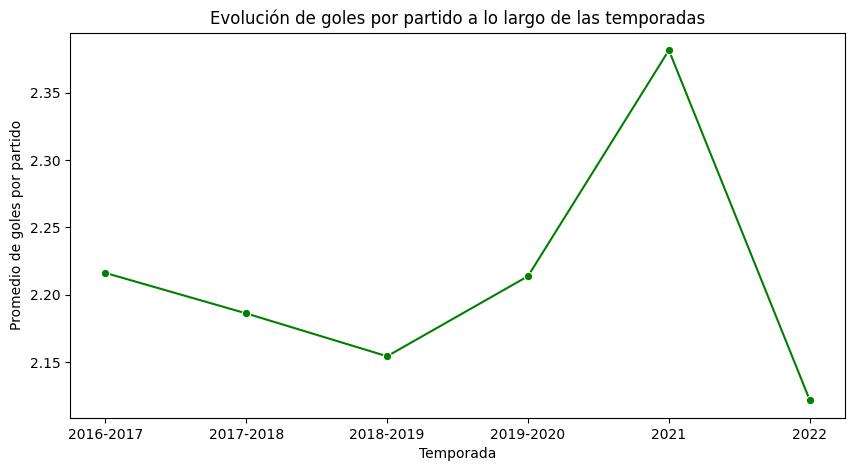

In [ ]:
ds["total_goles"] = ds["local_goles"] + ds["visitante_goles"]

goles_temporada = ds.groupby("temporada")["total_goles"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=goles_temporada, x="temporada", y="total_goles", marker="o", color="green")
plt.title("Evolución de goles por partido a lo largo de las temporadas")
plt.xlabel("Temporada")
plt.ylabel("Promedio de goles por partido")
plt.show()

**RTA**: Según el gráfico anterior, el promedio de goles por partido sufrió variaciones a lo largo de las temporadas del período 2016-2022. El mejor promedio de goles por partido se dió en la temporada 2021, mientras que el peor fue en el 2022. Se responde la pregunta 3.

# Definición de variables y Modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
datasetlimpio = ds.copy()

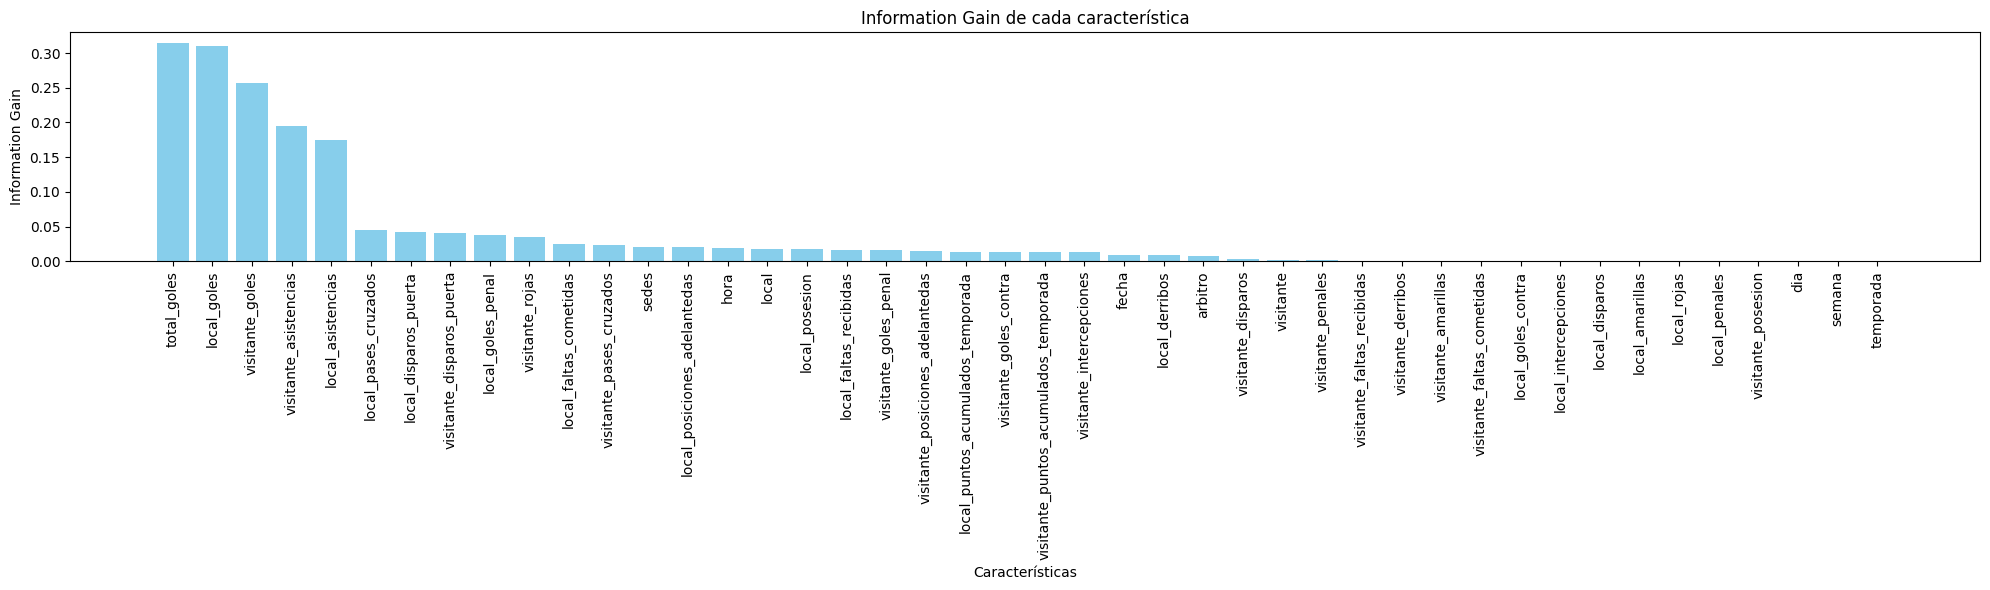

In [ ]:
cat_cols = datasetlimpio.select_dtypes(include='object').columns
for col in cat_cols:
  datasetlimpio[col] = LabelEncoder().fit_transform(datasetlimpio[col].astype(str))

X = datasetlimpio.drop(columns=['resultado'])
y = datasetlimpio['resultado']

information_gains = mutual_info_regression(X, y)

indices_ordenados = np.argsort(information_gains)[::-1]
# Obtiene los índices ordenados por Information Gain en orden descendente

information_gains_ordenados = information_gains[indices_ordenados]
# Ordena los Information Gain en el mismo orden

nombres_caracteristicas_ordenados = X.columns[indices_ordenados]
# Ordena el nombre de las características en el mismo orden

plt.figure(figsize=(20, 6))
plt.bar(range(len(information_gains_ordenados)), information_gains_ordenados, color='skyblue')
plt.xlabel('Características')
plt.ylabel('Information Gain')
plt.title('Information Gain de cada característica')
plt.xticks(np.arange(len(information_gains_ordenados)), nombres_caracteristicas_ordenados, rotation=90)
plt.tight_layout()
plt.show()
# Crea un gráfico de barras para visualizar los Information Gain

In [ ]:
umbral_bajo = 0.01
umbral_alto = 0.2
caracteristicas_seleccionadas = X.columns[
    (information_gains > umbral_bajo) & (information_gains < umbral_alto)
]

X_top_5 = X[caracteristicas_seleccionadas]
y = datasetlimpio['resultado']

X_train, X_test, y_train, y_test = train_test_split(X_top_5, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.59      0.65       133
           1       0.85      0.91      0.88       195
           2       0.72      0.81      0.77        97

    accuracy                           0.79       425
   macro avg       0.77      0.77      0.77       425
weighted avg       0.78      0.79      0.78       425



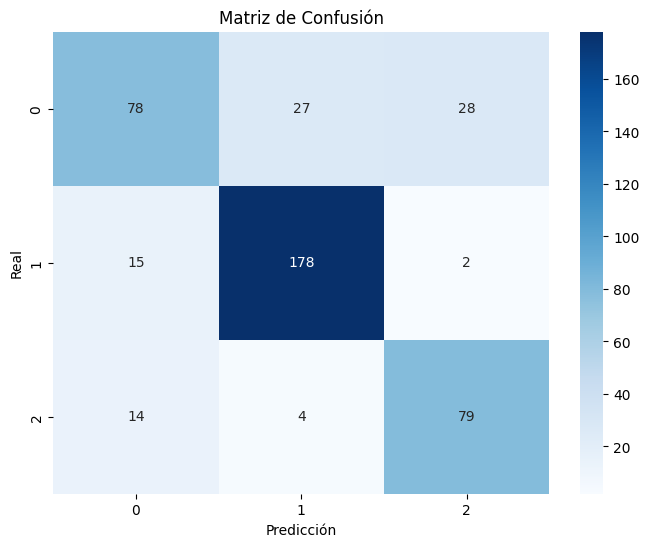

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Conclusiones

El modelo alcanzó una precisión del 79%, mostrando desempeño equilibrado tras la reducción de variables por Information Gain, que distingue entre las variables feature más vinculadas con la variable target (resultado). La clase 1 (empate) fue la mejor reconocida, mientras que las clases 0 (local) y 2 (visitante) presentaron algunas confusiones. La matriz indica un buen nivel en general, aunque requiere mejoras en la distinción de resultados con ventaja por parte de algún equipo. La implementación de IG permite un funcionamiento más optimizado ya que refuerza el uso de valores y variables neutrales que realzan resultados más realistas para el modelo.